
# Basis functions for the superconducting gap function with SOC

## Note
This code utilizes the Mathematica package [GTPack](https://gtpack.org/), which gives the character tables and Clebsch-Gordan coefficients for point groups.

## General idea

This notebook generates basis functions for the superconducting gap function in the presence of strong SOC. We focus on the point group $D_{4h}$, which is the case for strontium ruthenate and copper-doped bismuth selenide.

Let us first study the case without (or weak) SOC. Orbital and spin rotations are separately symmetry operations, so the total symmetry group of the Hamiltonian is
$$
G=\text{U}(1)\times G_{0,L}\times G_{0,S},
$$
where $G_{0,L}$ and $G_{0,S}$ are the point groups associated with orbital and spin rotations. The gap function transforms under an irrep of this group, and can be expanded in terms of basis functions belonging to this irrep,
$$
\Delta^{(l\otimes s)}(\mathbf{k})=\sum_{i=1}^{d_l}\sum_{a=1}^{d_s} \eta^{(l\otimes s)}_{i,a}\phi^{(l)}_i(\mathbf{k})\otimes \tilde{\chi}^{(s)}_{a}.
$$
Here $\phi^{(\mu)}_i$ and $\tilde{\chi}^{(\alpha)}_{a}$ are the basis functions for the orbital and spin parts, respectively. The indices $i=1,\dots,d_l$ and $a=1,\dots,d_s$ run over all the basis functions of the corresponding irreps. This irrep has dimension $d_l d_s$.

In the presence of strong SOC, orbital and spin rotations are not symmetries separately, only the combined rotation is. The symmetry group becomes
$$
G=\text{U}(1)\times G_{0,J},
$$
where $G_{0,J}$ is the point group associated with the combined orbital and spin rotations. Because the group is now smaller, the irreps in general have a smaller dimension. The gap function transforms under an irrep of this smaller group,
$$
\Delta^{(j)}=\sum_{i=1}^{d_j}\eta^{(j)}_i \Phi^{(j)}_i(\mathbf{k}),
$$
where $\Phi^{(j)}$ are the basis functions for the irrep $j$. If $G_0=\text{SO}(3)$, then this is just ordinary addition of angular momentum.

Our goal is to construct the basis functions $\Phi^{(j)}_i(\mathbf{k})$ in the (orbital) $\otimes$ (spin) basis for a particular irrep $j$. This is accomplished in two steps:
1. Given a target irrep $j$, find orbital $l$ and spin $s$ irreps such that when tensored will contain $j$ in its Clebsch-Gordan decomposition.
2. Construct basis functions using the Clebsch-Gordan coefficients.



In [1]:
(*Load package and specify group*)
Needs["GroupTheory`"];
d4h = GTInstallGroup[D4h, GOVerbose -> False];

(*Extract data from character table*)
(*classes = equivalence classes, chi = matrix of characters, and irreps = names of irreps*)
{classes,chi,irreps} = GTCharacterTable[d4h, GOIrepNotation -> "Mulliken", GOVerbose -> False];


Nc = Length[classes]; (*Number of ccl*)
nc = {}; (*Number of elements in each ccl*)
For[c=1, c<=Length[classes], c++, nc = Append[nc, Length[classes[[c]]]]];
G = Total[nc]; (*Order of group*)

We can find the multiplicity of a certain irrep $j$ in the irrep $l\otimes s$ using
$$
m=\frac{1}{|G|}\sum_{c}n_c \chi^{(j)*}_c \chi_c^{(l\otimes s)}=\frac{1}{|G|}\sum_{c}n_c \chi^{(j)*}_c \chi_c^{(l)}\chi_c^{(s)}
$$
We don't need to actually do this for all irreps, since we know the spin part can only be in $A_{1g}$, $A_{2u}$, or $E_u$.

In [11]:
mult=Table[0,{j,1,Nc},{l,1,Nc},{s,1,3}]; (*Matrix to denote the multiplicity for each (j,l,s) triplet*)


spin={1,2,10}; (*The spin irreps we want to tensor*)

(*Calculate the multiplicty*)
For [j=1, j<=Nc, j++, 
    For[l=1, l<=Nc, l++,
        For[s=1, s<=Length[spin], s++,
            m=0;
            For[c=1, c<=Nc, c++,
                 m=m+nc[[c]]*chi[[j,c]]*chi[[l,c]]*chi[[spin[[s]],c]]
                ];
            mult[[j,l,s]]=m/G;
            ]
        ]
    ]


We have obtained the array $\text{mult}(j,l,s)$, which lists the multiplicity of $j$ in $l\otimes s$. To make it more understandable, we list the results in a table.

A         A         E
       1g        2g        g
A     A  (1)    A  (1)    E (1) 
 1g    1g        2g        g

A     A  (1)    A  (1)    E (1) 
 2g    2g        1g        g

B     B  (1)    B  (1)    E (1) 
 2g    2g        1g        g

A     A  (1)    A  (1)    E (1) 
 2u    2u        1u        u

B     B  (1)    B  (1)    E (1) 
 2u    2u        1u        u

B     B  (1)    B  (1)    E (1) 
 1u    1u        2u        u

A     A  (1)    A  (1)    E (1) 
 1u    1u        2u        u

B     B  (1)    B  (1)    E (1) 
 1g    1g        2g        g

E     E (1)     E (1)     A  (1) B  (1) B  (1) A  (1) 
 u     u         u         2u     2u     1u     1u

E     E (1)     E (1)     A  (1) A  (1) B  (1) B  (1) 
 g     g         g         1g     2g     2g     1g
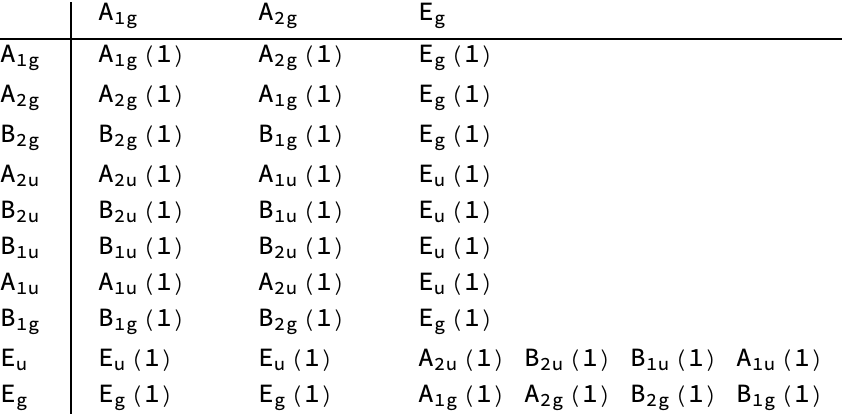

In [15]:
(*List data in a table*)
tensor = Table["",{c,1,Nc},{c,1,Length[spin]}]; (*Create a table to list strings*) 



For[s=1, s<=Length[spin], s++,
    For[j=1, j<=Nc, j++,
        For[l=1, l<=Nc, l++,
            If[mult[[j,l,s]]>0,
                tensor[[j,s]]= tensor[[j,s]]<>ToString[irreps[[l]],StandardForm]<>"("<>ToString[mult[[j,l,s]] ]<>")"<>" ";
                ];
            ]
            
        ]
    ]

TableForm[tensor, TableHeadings -> {irreps, {Subscript["A","1g"],Subscript["A","2g"],Subscript["E","g"]}}]

On the left are the target irreps in the $j$ basis. At the top are the irreps for the spin part. Inside the table are the orbital irreps we need to tensor the spin part with to obtain the target irrep. In parenthesis are the multiplicites.

## Basis functions

To construct the basis functions, we need the Clebsch-Gordan coefficients. Let us consider the irreps $A_{2u},B_{2u}, B_{1u}$, and $A_{1u}$, which can be obtained from the tensor product $E_u\otimes E_g$.

        A2u          B2u       B1u          A1u

        1            1         1            1

j   k   1            1         1            1

                                    1          1
                               -(-------)   -------
1   1   0            0           Sqrt[2]    Sqrt[2]

             1          1
        -(-------)   -------
1   2     Sqrt[2]    Sqrt[2]   0            0

           1            1
        -------      -------
2   1   Sqrt[2]      Sqrt[2]   0            0

                                  1            1
                               -------      -------
2   2   0            0         Sqrt[2]      Sqrt[2]


1         1
{{{0, -(-------), -------, 0}}}
        Sqrt[2]   Sqrt[2]
         1        1
{{{0, -------, -------, 0}}}
      Sqrt[2]  Sqrt[2]
        1               1
{{{-(-------), 0, 0, -------}}}
     Sqrt[2]         Sqrt[2]
      1              1
{{{-------, 0, 0, -------}}}
   Sqrt[2]        Sqrt[2]
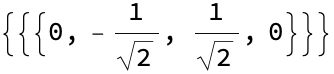
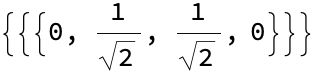
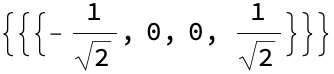
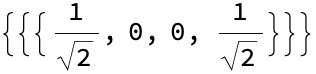

In [397]:
(*We need the character table to get the irreps*)
charactertable = GTCharacterTable[d4h, GOVerbose -> False];

(*Get the explicit representation matrices*)
Gamma1 = GTGetIrep[d4h, 9, charactertable]; (*E_u*)
Gamma2 = GTGetIrep[d4h, 10, charactertable]; (*E_g*)
Gamma3 = GTGetIrep[d4h, 4, charactertable]; (*A_1u*)
Gamma4 = GTGetIrep[d4h, 5, charactertable]; (*A_1u*)
Gamma5 = GTGetIrep[d4h, 6, charactertable]; (*A_1u*)
Gamma6 = GTGetIrep[d4h, 7, charactertable]; (*A_1u*)

cg3 = GTClebschGordanCoefficients[Gamma1, Gamma2, Gamma3]
cg4 = GTClebschGordanCoefficients[Gamma1, Gamma2, Gamma4]
cg5 = GTClebschGordanCoefficients[Gamma1, Gamma2, Gamma5]
cg6 = GTClebschGordanCoefficients[Gamma1, Gamma2, Gamma6]
GTClebschGordanTable[Gamma1, Gamma2, {cg3,cg4,cg5,cg6}, {"A2u","B2u","B1u","A1u"}]